<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L06%20-%20Neural%20Networks%20Basics_solved.ipynb)

# Labor 06 - Neural Networks Basics

## Handwritten numbers II.

In the next exercise we will move on to the use of neural networks. As an example exercise, we will use the recognition of handwritten numbers (0-9), which we did in the previous lab (L05). In this notebook we will take a slightly different approach and introduce the neurla network concept.

### 0: Introduction of Neural Networks

The labs so far have taught us the basics of learning algorithms. We have extended our methods to the multi-variable case and have also dealt with regression and classification problems.

The model so far can be summarized as shown in the figure below:

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab06/Pics/L06_Neuron_01.png?raw=1" width="450">

, where <br>
$x_{n}$ indicates the inputs, $x_{0} = 1$ is the BIAS <br>
$w_{n}$ indicates the weights <br>
$s$ is the summed output, including the weighted inputs <br>
$a$ is the activation function (for example: sigmoid) <br>
$y$ indicate the output <br>

On closer inspection, this diagram actually resembles a biological neuron.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab06/Pics/L06_Neuron_02.png?raw=1" width="450">

So let us introduce the above model as a neuron or perceptron model.

The neurons can be arranged in a multilayer network. This network is called a neural network or MLP (Multi Layer Perceptron).

#### Multi Layer Perceptron (MLP) structure and operation

Consider the following architecture:

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab06/Pics/L06_NeuralNet.png?raw=1" width="350">

The sketched case consists of an input layer, a hidden layer and an output layer. The input layer contains 2 neurons without BIAS, the hidden layer contains 3 neurons without BIAS and the output layer consists of 1 neuron. BIAS members can be added layer by layer in the model and are associated with an appropriate weight to the next layer's elements.

We can speak of a Fully Connected Network if each neuron is connected to all neurons in the next layer. Assuming a sigmoid activation function without BIAS members, let us review the Forward Step of the prediction and the dimensions of the required matrices and vectors. Weights are assumed to be known.

$ \underset{1\times 2}{\mathrm{x}} \times \underset{2\times 3}{\mathrm{w^{(1)}}} = \underset{1\times 3}{\mathrm{s^{(2)}}} $

$ \underset{1\times 3}{\mathrm{a^{(2)}}} = f(\underset{1\times 3}{\mathrm{s^{(2)}}}) = sigmoid(\underset{1\times 3}{\mathrm{s^{(2)}}}) $

$ \underset{1\times 1}{\mathrm{s^{(3)}}} = \underset{1\times 3}{\mathrm{a^{(2)}}} \times \underset{3\times 1}{\mathrm{w^{(2)}}} $

$ \underset{1\times 1}{\mathrm{\hat{y}}} = f(\underset{1\times 1}{\mathrm{s^{(3)}}}) = sigmoid(\underset{1\times 1}{\mathrm{s^{(3)}}}) $

Let's see how this works in practice through our example.

### 1: Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### 2: Data load

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab06/Lab6data.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab06/Lab6weights.mat

--2024-12-10 21:54:19--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab06/Lab6data.mat
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab06/Lab6data.mat [following]
--2024-12-10 21:54:19--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab06/Lab6data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7511764 (7.2M) [application/octet-stream]
Saving to: ‘Lab6data.mat’

Lab6data.mat        100%[===================>]   7.16M  --.-KB/s    in 0.06s   

2024-12-10 21:54:20 (127 MB/s) - ‘Lab6data.mat’ saved 

Load in the data! Use the Pandas package to do this and then convert it into a numpy array.

In [3]:
data = loadmat("Lab6data.mat")
X = data["X"]
Y = data ["y"]
m = X.shape[0]
del data
print('''Shape of the dataset in order X and Y:
''',X.shape,'\n',Y.shape,'\n')

data = loadmat("Lab6weights.mat")                       # load in pretrained weights
w1 = data["Theta1"]
w2 = data["Theta2"]                                     # arrange weights
del data
print('''Shape of the weights in order 1 and 2:
''',w1.shape,'\n',w2.shape,'\n')


Shape of the dataset in order X and Y:
 (5000, 400) 
 (5000, 1) 

Shape of the weights in order 1 and 2:
 (25, 401) 
 (10, 26) 



After examining the dimensions of the scanned data, we see that there are 5000 input samples. We have 400 input parameters, which corresponds to the number of pixels in 20x20 images. Our first weight matrix contains 401 columns, indicating that the input data has been augmented with the BIAS. The hidden layer contains 25 neurons, as indicated by the first dimension of the first weight matrix. The dimensions of the second weight matrix show that there are 10 output neurons in the model corresponding to the 10 digits and 26 bemental values when added with BIAS.  

### 3: Visualization

To visualise the data, we randomly select 100 samples, reshape them back to their original shape and plot them.

Printing some random data ...


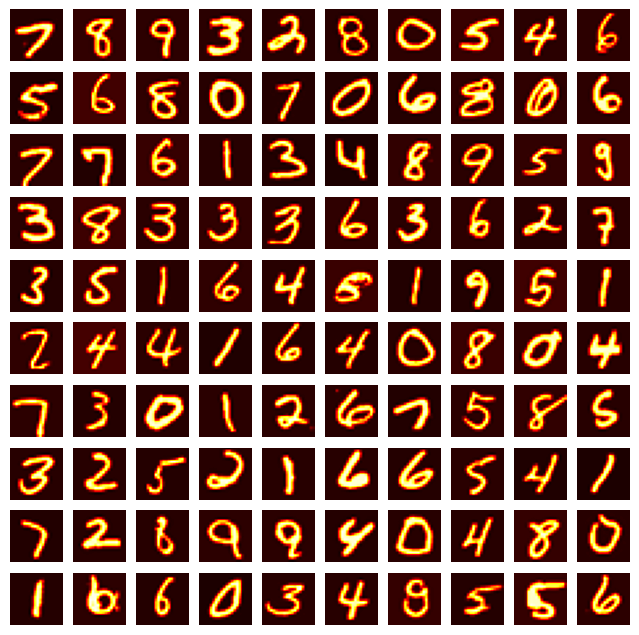

In [5]:
print("Printing some random data ...")
fig, ax = plt.subplots(10,10, figsize =(8,8))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[np.random.randint(0,m),:].reshape(20,20, order = "F"), cmap="hot")
        ax[i,j].axis("off")
plt.show()

### 4: Prediction and Accuracy

Based on the theoretical introduction, we implement the prediction step (Forward Step). Pay attention to the addition of BIAS members and appropriate matrix dimensions. Since we are talking about a classification problem, we have to select the appropriate class of the calculated probabilities.

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X,w1,w2):
    ################### CODE HERE ########################
    # Implement the prediction (forward step) for a 2 layer Neural Network
    # Given the input and the 2 weight matrix.
    # Make sure the dimensions are matching.
    # Add a Bias to each layer.
    # The prediction can be calculated with a max pooling step at the end.


    # Add bias to the input layer
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    # Calculate the activation of the hidden layer
    hidden_layer_activation = sigmoid(X @ w1.T)

    # Add bias to the hidden layer
    hidden_layer_activation = np.concatenate([np.ones((hidden_layer_activation.shape[0], 1)), hidden_layer_activation], axis=1)

    # Calculate the activation of the output layer
    output_layer_activation = sigmoid(hidden_layer_activation @ w2.T)

    # Get the predictions by finding the index of the maximum value in each row
    pred = np.argmax(output_layer_activation, axis=1) + 1







    #####################################################

    return pred

Let's try out the prediction function we have written. We randomly select an element and run the predict() function on it.

Showing You a 9 
The prediction was 9


<ipython-input-7-f5adb982e581>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Showing You a %.0f'% Y[i], '\nThe prediction was %.0f' % pred_ex)


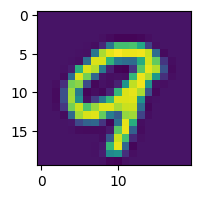

In [7]:
import random
i= random.randint(1,m+1)

X_ex = X[i,:].reshape(1,-1)       # correct matrix dimensions and format due to reshape()
pred_ex = predict(X_ex,w1,w2)

print('Showing You a %.0f'% Y[i], '\nThe prediction was %.0f' % pred_ex)
fig = plt.figure(figsize=(2,2))
plt.imshow(X[i,:].reshape(20,20).T)
plt.show()

By performing the prediction on all the elements and comparing it with the original labels, we can see how well the algorithm learned the sample data.

In [8]:
def accuracy(pred,Y):
    return (np.sum(pred[:,np.newaxis]==Y)/5000)*100


pred = predict(X,w1,w2)
print('\nTraining set Accuracy: ', accuracy(pred,Y), ' %')


Training set Accuracy:  97.52  %


<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>